#  A Waiter's Tips Prediction

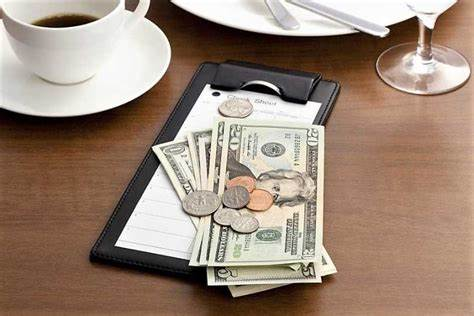



Giving a waiter or waitress a tip does a lot for them. You are signaling to them that you appreciate them and want to give something back. Their hard work makes your experience at the restaurant more enjoyable. Many times the people serving you get paid a base, or tipped, wage, so they depend on getting a tip. We always do our best to be nice to the people helping us. It makes our day and their day a little bit better by showing respect and appreciation for them.

The model is trying to predict a watier's tip according to some features. The dataset is from the Kaggle website and includes 244 samples and 7 features. 

## <u>  Colmuns: <u>
* **total_bill** - How much the meal cost in dollars.

* **tip** - A waiter's tip (the feature we will predict).

* **sex** - Waiter's sex (male or female).

* **smoker** - If diners are smokers. 

* **day** - Day in the week.

* **time** - Dinner or Lunch.

* **size** - How many diners.

## <u> Part 1 : Familiarity with the dataset

Our hypothesis is that men gives a higher tip than women

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

##### Loading the dataset

In [125]:
tips =pd.read_csv(r'C:\\Users\\97253\Waiter-Tips\\Waiter-Tips\\tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##### Some Samples

In [126]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
9,14.78,3.23,Male,No,Sun,Dinner,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
1,10.34,1.66,Male,No,Sun,Dinner,3
75,10.51,1.25,Male,No,Sat,Dinner,2
123,15.95,2.00,Male,No,Thur,Lunch,2


##### Features categories

In [128]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


##### Statics information of the dataset

In [129]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


##### Ratio between the categorical variables

Text(0.5, 1.0, 'Day Distribution')

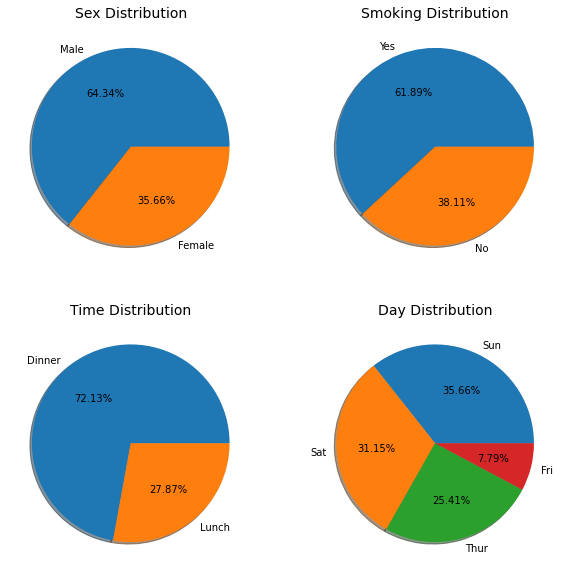

In [130]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["Male", "Female"]
values = tips['sex'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Sex Distribution", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = tips['smoker'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Smoking Distribution", fontdict={'fontsize': 14})

labels = ["Dinner", "Lunch"]
values = tips['time'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Time Distribution", fontdict={'fontsize': 14})

labels = ["Sun", "Sat","Thur","Fri"]
values = tips['day'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Day Distribution", fontdict={'fontsize': 14})

##### Normal Distribution Histogram For Total Bill

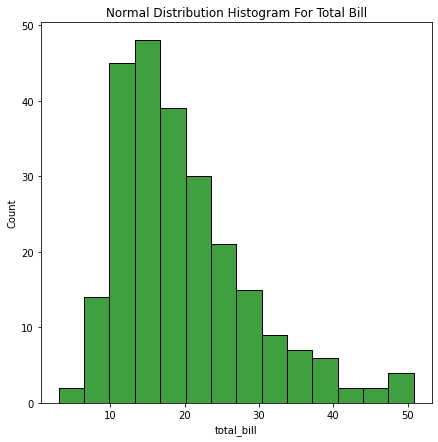

In [131]:
plt.figure(figsize=(7,7))
sns.histplot(tips[['total_bill']], x = "total_bill",color = 'g')
plt.title("Normal Distribution Histogram For Total Bill")
plt.show()

##### Check the relationship between total bill and tip

Text(0.5, 1.0, 'Relationship between total bill and tip')

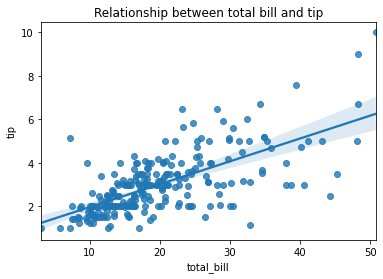

In [132]:
sns.regplot(x =tips['total_bill'], y=tips['tip'])
plt.title('Relationship between total bill and tip')

In [134]:
pd.DataFrame(tips.groupby('sex').tip.mean())

,tip
sex,
Female,2.833448
Male,3.089618


##### As we can see our hypothesis is true, let's try to focus more

In [135]:
df_smoke_sex=pd.DataFrame(tips.groupby(['smoker','sex']).tip.mean())
df_smoke_sex

tip
smoker sex             
No     Female  2.773519
       Male    3.113402
Yes    Female  2.931515
       Male    3.051167

* We can see that women smokers give more tip than women not smokers 
* We can see that men smokers give less tip than men not smokers 

## <u> Part 2: Correlations

##### Convert categorial columns to numbers.

In [137]:
t_dummies = pd.get_dummies(tips,columns=['day','sex','time','smoker'], dummy_na=False)
tips = t_dummies
tips

,total_bill,tip,size,day_Fri,day_Sat,day_Sun,day_Thur,sex_Female,sex_Male,time_Dinner,time_Lunch,smoker_No,smoker_Yes
0,16.99,1.01,2,0,0,1,0,1,0,1,0,1,0
1,10.34,1.66,3,0,0,1,0,0,1,1,0,1,0
2,21.01,3.50,3,0,0,1,0,0,1,1,0,1,0
3,23.68,3.31,2,0,0,1,0,0,1,1,0,1,0
4,24.59,3.61,4,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,0,0,1,1,0,1,0
240,27.18,2.00,2,0,1,0,0,1,0,1,0,0,1
241,22.67,2.00,2,0,1,0,0,0,1,1,0,0,1
242,17.82,1.75,2,0,1,0,0,0,1,1,0,1,0


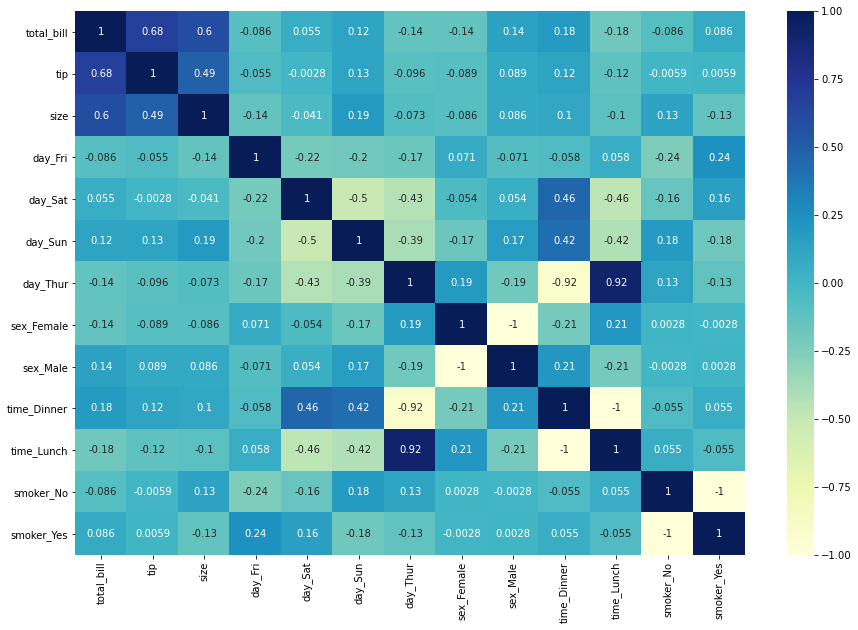

In [139]:
correlations = tips.corr()
plt.figure (figsize= (15,10))

heatmap_diabetes = sns.heatmap(tips.corr(), annot=True, cmap='YlGnBu')

plt.show()

#### High correlations between total_bill & tip

    

## <U> Part 3:Select metrics scoring

* **Mean Absolute Error** Mean absolute error is a simple sum of the absolute difference between actual and predicted target value divided by a number of samples. 

* **Mean Squared Error**  meaning is different than the residual error meaning. While the residual error is a measure of how accurately the regression model predicts each individual data point, the MSE measures how accurately the regression model predicts the data set as a whole. A data set may have numerous residual errors, but only one MSE. Because the mean squared error is calculated using squared numbers, it is always a positive value.

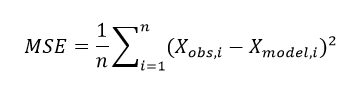

### We choose to score by Mean Absolute Error


## <U> Part 4: Train-Test-Split & Scaling 

#### Train-Test-Split

In [22]:
X = tips.drop(['tip'] , axis=1 , inplace=False)
y = tips['tip']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)

#### Scale with MinMaxScaler

In [24]:
scaler_model = MinMaxScaler()

X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = X_train_normalized.columns

scaler_model.fit(X_train_normalized[numerical_features])

X_train_normalized = scaler_model.transform(X_train_normalized[numerical_features])

X_test_normalized = scaler_model.transform(X_test_normalized[numerical_features])


In [25]:
tips_train = pd.DataFrame(data = X_train_normalized , columns = X_train.columns)
tips_test = pd.DataFrame(data = X_test_normalized , columns = X_test.columns)

## <U>Part 5: Models

## Dummy model

In [145]:
dummy_regr = DummyRegressor()
dummy_regr.fit(tips_train, y_train)

y_predict = dummy_regr.predict(tips_test)
print('mean absolute error: ' , str(metrics.mean_absolute_error(y_predict , y_test)))
print('mean squared error: ' , str(metrics.mean_squared_error(y_predict , y_test)))


mean absolute error:  1.047104133961277
mean squared error:  1.4486680232392768


## Linear Regression

In [146]:
LR = LinearRegression()
scores_mae = cross_val_score(LR, tips_train, y_train, scoring='neg_mean_absolute_error', cv=10)
scores_mse = cross_val_score(LR, tips_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('mean absolute error: ' , str((scores_mae*-1).mean()))
print('mean squared error: ' , str((scores_mse*-1).mean()))

mean absolute error:  0.8017849311756068
mean squared error:  1.2337726692471969


### Linear Regression gives 0.80%

## Random Forest

In [171]:
RFR = RandomForestRegressor()

scores_mae = cross_val_score(RFR, tips_train, y_train, scoring='neg_mean_absolute_error', cv=10)
scores_mse = cross_val_score(RFR, tips_train, y_train, scoring='neg_mean_squared_error', cv=10)

print('mean absolute error: ' , str(-(scores_mae.mean())))
print('mean squared error: ' , str(-(scores_mse.mean())))

mean absolute error:  0.7946888491479065
mean squared error:  1.196621146294737


### Random Forest gives 0.79%

## The best model is Linear Regression
### let's check the test

In [87]:
LR_final = LinearRegression()
LR_final.fit(tips_train , y_train)
final_pred = LR_final.predict(tips_test)
print('mean absolute error: ' , str(MAE(final_pred , y_test)) )
print('mean squared error: ' , str(MSE(final_pred , y_test)))

mean absolute error:  0.6671331480264893
mean squared error:  0.7033566017436103


### The final score of the Linear Regression model is 0.66% by MAE